In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

Przygotować programy do aproksymacji średniokwadratowej (dyskretnej) wielomianami algebraicznymi.

Zadana funkcja

In [3]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * math.cos(1.5 * x)

f_range_a = -4 * math.pi
f_range_b = 4 * math.pi

Rysowanie funkcji

In [4]:
def plot_function(func, range_a, range_b, func_x = None):
    
    if func_x == None:
        func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = [func(func_x[i]) for i in range(len(func_x))]

    plt.plot(func_x, func_y, label = "Zadana funkcja", color = 'blue')

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Aproksymacja wielomianowa

![title](img_vsc/img01.png)

![title](img_vsc/img02.png)

![title](img_vsc/img03.png)

![title](img_vsc/img04.png)

In [89]:
def calculate_approx(xs, ys, m, w):
    
    G = np.zeros((m, m))
    B = np.zeros(m)
    
    for j in range(m):
        for k in range(m):
            
            G[j][k] = sum([w[i] * (xs[i] ** (j + k)) for i in range(len(xs))])
        
        B[j] = sum([w[i] * ys[i] * (xs[i] ** j) for i in range(len(xs))])
        
    print(G)
    print(B)

    A = np.linalg.solve(G, B)
    
    return lambda x : sum([A[i] * (x ** i) for i in range(m)])
    

In [48]:
def draw_approx(n, m, w):
    xs = np.linspace(f_range_a, f_range_b, n)
    ys = [f(xs[i]) for i in range(len(xs))]
    
    calculated_function = calculate_approx(xs, ys, m, w)
    calculated_ys = [calculated_function(xs[i]) for i in range(len(xs))]

    plot_function(f, f_range_a, f_range_b)
    
    plt.plot(xs, calculated_ys, color = 'red', label = "Funkcja Funkcja interpolowana")
    plt.scatter(xs, ys, color = 'black', label = "Nodes")
    plt.title("Function approximation")
    plt.legend()
    plt.grid(True)
    plt.savefig("approximation.png")
    plt.show()

In [91]:
draw_approx(3, 6, [1 for i in range(3)])

[[3.00000000e+00 0.00000000e+00 3.15827341e+02 0.00000000e+00
  4.98734546e+04 0.00000000e+00]
 [0.00000000e+00 3.15827341e+02 0.00000000e+00 4.98734546e+04
  0.00000000e+00 7.87570027e+06]
 [3.15827341e+02 0.00000000e+00 4.98734546e+04 0.00000000e+00
  7.87570027e+06 0.00000000e+00]
 [0.00000000e+00 4.98734546e+04 0.00000000e+00 7.87570027e+06
  0.00000000e+00 1.24368074e+09]
 [4.98734546e+04 0.00000000e+00 7.87570027e+06 0.00000000e+00
  1.24368074e+09 0.00000000e+00]
 [0.00000000e+00 7.87570027e+06 0.00000000e+00 1.24368074e+09
  0.00000000e+00 1.96394190e+11]]
[2.10551561e+02 0.00000000e+00 3.32489697e+04 0.00000000e+00
 5.25046685e+06 0.00000000e+00]


LinAlgError: Singular matrix

In [26]:
def approx(n, m, w):
    xs = np.linspace(f_range_a, f_range_b, n)
    ys = [f(xs[i]) for i in range(len(xs))]
    
    calculated_function = calculate_approx(xs, ys, m, w)
    #calculated_ys = [calculated_function(xs[i]) for i in range(len(xs))]

    return calculated_function

    #plot_function(f, f_range_a, f_range_b)
    
    #plt.plot(xs, calculated_ys, color = 'red', label = "Funkcja Funkcja interpolowana")
    #plt.scatter(xs, ys, color = 'black', label = "Nodes")
    #plt.title("Function approximation")
    #plt.legend()
    #plt.grid(True)
    #plt.savefig("approximation.png")
    #plt.show()

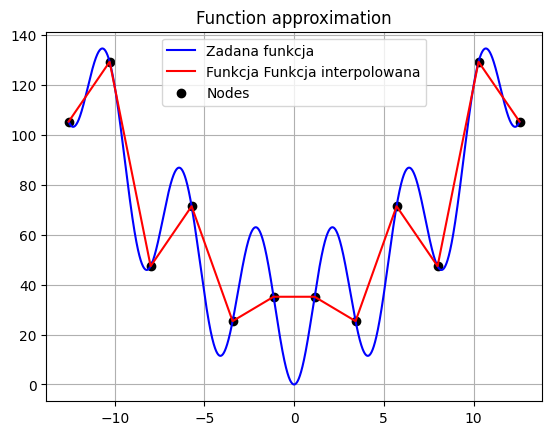

In [49]:
draw_approx(12,12, [1 for _ in range(12)])

Sposoby obliczania błędów aproksymacji

Błąd maksymalny

In [78]:
def approximation_maximum_difference(n, m, test_points):

    maksimum = float('-inf')

    #Evenly distributed xs
    xs = np.linspace(f_range_a, f_range_b, test_points)
        
    approx_function = approx(n, m, [1 for _ in range(n)])

    for i in range(test_points):

        temp = abs(f(xs[i]) - approx_function(xs[i]))

        maksimum = temp if temp > maksimum else maksimum
    
    return maksimum

In [87]:
def best_approximation_maximum_difference():

    for i in range(3, 100):
        for j in range(i, 100):
            print(i, j)
            print(approximation_maximum_difference(i, j, 1000))

In [82]:
approximation_maximum_difference(20, 20, 1000)

3365.4010427966637

In [90]:
best_approximation_maximum_difference()

3 3
[[3.00000000e+00 0.00000000e+00 3.15827341e+02]
 [0.00000000e+00 3.15827341e+02 0.00000000e+00]
 [3.15827341e+02 0.00000000e+00 4.98734546e+04]]
[  210.55156056     0.         33248.96973961]
59.99866494451235
3 4
[[3.00000000e+00 0.00000000e+00 3.15827341e+02 0.00000000e+00]
 [0.00000000e+00 3.15827341e+02 0.00000000e+00 4.98734546e+04]
 [3.15827341e+02 0.00000000e+00 4.98734546e+04 0.00000000e+00]
 [0.00000000e+00 4.98734546e+04 0.00000000e+00 7.87570027e+06]]
[  210.55156056     0.         33248.96973961     0.        ]
59.99866494451235
3 5
[[3.00000000e+00 0.00000000e+00 3.15827341e+02 0.00000000e+00
  4.98734546e+04]
 [0.00000000e+00 3.15827341e+02 0.00000000e+00 4.98734546e+04
  0.00000000e+00]
 [3.15827341e+02 0.00000000e+00 4.98734546e+04 0.00000000e+00
  7.87570027e+06]
 [0.00000000e+00 4.98734546e+04 0.00000000e+00 7.87570027e+06
  0.00000000e+00]
 [4.98734546e+04 0.00000000e+00 7.87570027e+06 0.00000000e+00
  1.24368074e+09]]
[2.10551561e+02 0.00000000e+00 3.32489697e+0

LinAlgError: Singular matrix

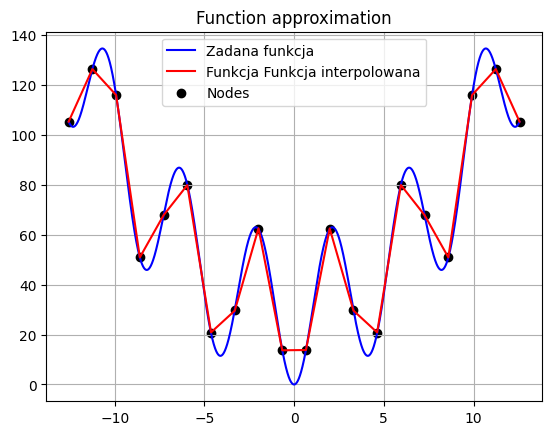

In [68]:
draw_approx(20, 20, [1 for i in range(20)])

In [61]:
def interpolation_mean_difference(n, m, test_points):

    suma = 0

    xs = np.linspace(f_range_a, f_range_b, test_points)
        
    approx_function = approx(n, m, [1 for _ in range(n)])

    for i in range(test_points):

        suma += (f(xs[i]) - approx_function(xs[i]))
    
    print(f"{suma / test_points}")

In [75]:
interpolation_mean_difference(5, 6, 1000)

-12.653786453291374


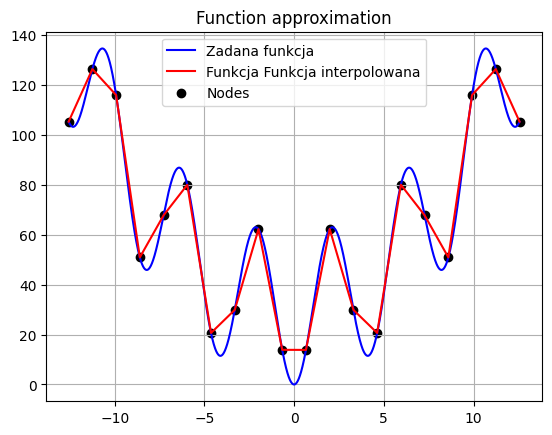

In [73]:
draw_approx(20, 28, [1 for i in range(20)])